## Questão 1

Carregando dados:

In [42]:
import pandas as pd

# Carregar dados de treinamento
train_data = pd.read_csv('credtrain.txt', sep='\t', header=None)
test_data = pd.read_csv('credtest.txt', sep='\t', header=None)

# Definir os nomes das colunas
columns = [
    'ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE'
]
train_data.columns = columns
test_data.columns = columns

Passo 2: Pré-processamento dos dados
Precisamos codificar os atributos categóricos e normalizar os atributos contínuos.

Codificação de atributos categóricos
Vamos usar One-Hot Encoding para os atributos categóricos.

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Selecionar colunas categóricas
categorical_cols = ['ESCT', 'NDEP', 'TIPOR', 'TEL']

# Aplicar One-Hot Encoding
# The 'sparse' argument has been replaced with 'sparse_output'
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train = encoder.fit_transform(train_data[categorical_cols])
encoded_test = encoder.transform(test_data[categorical_cols])

# Criar DataFrames com as colunas codificadas
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_cols))

# Remover colunas categóricas originais e adicionar as codificadas
train_data = train_data.drop(categorical_cols, axis=1).join(encoded_train_df)
test_data = test_data.drop(categorical_cols, axis=1).join(encoded_test_df)

Normalização de atributos contínuos
Vamos usar StandardScaler para normalizar os atributos contínuos.

In [44]:
from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas
numeric_cols = ['RENDA', 'VBEM', 'NPARC', 'VPARC', 'IDADE', 'RESMS', 'ENTRADA']

# Aplicar StandardScaler
scaler = StandardScaler()
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

Passo 3: Separar features e target
Agora, vamos separar as features (X) e o target (y) para treinamento e teste.

In [45]:
# Separar features e target
X_train = train_data.drop('CLASSE', axis=1)
y_train = train_data['CLASSE']
X_test = test_data.drop('CLASSE', axis=1)
y_test = test_data['CLASSE']

Passo 4: Treinar os modelos
Vamos treinar os modelos LogisticRegression, KNeighborsClassifier e XGBClassifier.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Modelo 2: K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Modelo 3: XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

Passo 5: Avaliar os modelos
Vamos avaliar os modelos usando a matriz de confusão e o relatório de classificação.

Matriz de Confusão e Relatório de Classificação

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Função para exibir resultados
def evaluate_model(y_true, y_pred, model_name):
    print(f"Matriz de Confusão - {model_name}:")
    print(confusion_matrix(y_true, y_pred))
    print(f"\nRelatório de Classificação - {model_name}:")
    print(classification_report(y_true, y_pred))

# Avaliar Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Avaliar K-Nearest Neighbors
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

# Avaliar XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Matriz de Confusão - Logistic Regression:
[[291  15]
 [ 48 223]]

Relatório de Classificação - Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       306
           1       0.94      0.82      0.88       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.90      0.89      0.89       577

Matriz de Confusão - K-Nearest Neighbors:
[[275  31]
 [ 53 218]]

Relatório de Classificação - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       306
           1       0.88      0.80      0.84       271

    accuracy                           0.85       577
   macro avg       0.86      0.85      0.85       577
weighted avg       0.86      0.85      0.85       577

Matriz de Confusão - XGBoost:
[[273  33]
 [ 40 231]]

Relatório de Classificação - XGBoost:
              precisio

Resultados Esperados
A matriz de confusão mostrará os valores de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

O relatório de classificação mostrará métricas como precisão, recall, F1-score e acurácia para cada modelo.

Conclusão
Com isso, você terá os modelos treinados e avaliados

## Questão 2 

Passo 1: Carregar os Dados

In [48]:
import pandas as pd

# Carregar dados de treinamento e teste
train_data = pd.read_csv('credtrain.txt', sep='\t', header=None)
test_data = pd.read_csv('credtest.txt', sep='\t', header=None)

# Definir nomes das colunas
columns = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']
train_data.columns = columns
test_data.columns = columns

Passo 2: Aplicar Target Encoding
Vamos usar a biblioteca category_encoders para aplicar o Target Encoding.

In [49]:
from category_encoders import TargetEncoder

# Selecionar colunas categóricas
categorical_cols = ['ESCT', 'NDEP', 'TIPOR', 'TEL']

# Aplicar Target Encoding
encoder = TargetEncoder(cols=categorical_cols)
train_data_encoded = encoder.fit_transform(train_data[categorical_cols], train_data['CLASSE'])
test_data_encoded = encoder.transform(test_data[categorical_cols])

# Substituir colunas categóricas originais pelas codificadas
train_data[categorical_cols] = train_data_encoded
test_data[categorical_cols] = test_data_encoded

Passo 3: Normalizar Atributos Numéricos
A normalização dos atributos numéricos já foi feita na Questão 1.

In [50]:
from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas
numeric_cols = ['RENDA', 'VBEM', 'NPARC', 'VPARC', 'IDADE', 'RESMS', 'ENTRADA']

# Aplicar StandardScaler
scaler = StandardScaler()
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

Passo 4: Separar Features e Target
Separe as features (X) e o target (y) para treinamento e teste:

In [51]:
# Separar features e target
X_train = train_data.drop('CLASSE', axis=1)
y_train = train_data['CLASSE']
X_test = test_data.drop('CLASSE', axis=1)
y_test = test_data['CLASSE']

Passo 5: Treinar e Avaliar Modelos

Agora, treine os modelos (Logistic Regression, K-Nearest Neighbors e XGBoost) usando os dados codificados com Target Encoding e compare os resultados com os obtidos na Questão 1.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Modelo 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Modelo 2: K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Modelo 3: XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Avaliar modelos
def evaluate_model(y_true, y_pred, model_name):
    print(f"Matriz de Confusão - {model_name}:")
    print(confusion_matrix(y_true, y_pred))
    print(f"\nRelatório de Classificação - {model_name}:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Matriz de Confusão - Logistic Regression:
[[287  19]
 [ 49 222]]

Relatório de Classificação - Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       306
           1       0.92      0.82      0.87       271

    accuracy                           0.88       577
   macro avg       0.89      0.88      0.88       577
weighted avg       0.89      0.88      0.88       577

Matriz de Confusão - K-Nearest Neighbors:
[[263  43]
 [ 61 210]]

Relatório de Classificação - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       306
           1       0.83      0.77      0.80       271

    accuracy                           0.82       577
   macro avg       0.82      0.82      0.82       577
weighted avg       0.82      0.82      0.82       577

Matriz de Confusão - XGBoost:
[[279  27]
 [ 42 229]]

Relatório de Classificação - XGBoost:
              precisio

## Questão 3

# Passo 1: Carregar os Dados


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 1. Carregar os dados
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# 2. Explorar a distribuição da variável alvo

Distribuição original: Counter({0: 3194, 1: 428})


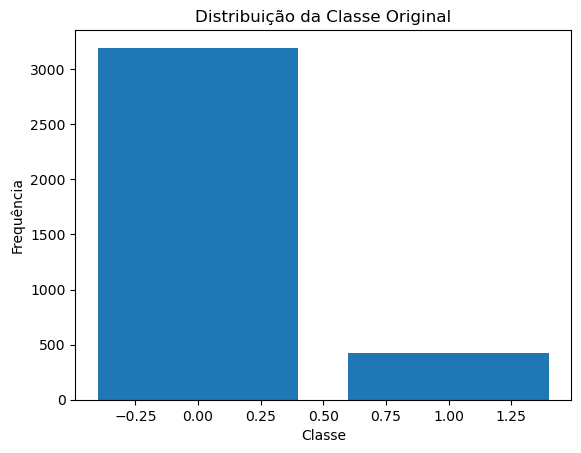

In [54]:
print("Distribuição original:", Counter(y_train))
plt.bar(Counter(y_train).keys(), Counter(y_train).values())
plt.title("Distribuição da Classe Original")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()

# 3. Aplicar técnicas de balanceamento

## (a) Undersampling

In [55]:
undersampler = RandomUnderSampler()
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
print("Distribuição após Undersampling:", Counter(y_train_under))

Distribuição após Undersampling: Counter({0: 428, 1: 428})


# (b) Oversampling (SMOTE)


In [56]:
oversampler = SMOTE()
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)
print("Distribuição após Oversampling:", Counter(y_train_over))

Distribuição após Oversampling: Counter({1: 3194, 0: 3194})


# 4. Treinar modelos XGBoost para cada abordagem

In [57]:
def train_and_evaluate(X_train_resampled, y_train_resampled, method):
    model = XGBClassifier()
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"\nResultados para {method}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Avaliar modelos

In [58]:
train_and_evaluate(X_train, y_train, "Sem Balanceamento")
train_and_evaluate(X_train_under, y_train_under, "Undersampling")
train_and_evaluate(X_train_over, y_train_over, "Oversampling")


Resultados para Sem Balanceamento:
[[1057    8]
 [  40  103]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1065
           1       0.93      0.72      0.81       143

    accuracy                           0.96      1208
   macro avg       0.95      0.86      0.89      1208
weighted avg       0.96      0.96      0.96      1208


Resultados para Undersampling:
[[975  90]
 [ 21 122]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1065
           1       0.58      0.85      0.69       143

    accuracy                           0.91      1208
   macro avg       0.78      0.88      0.82      1208
weighted avg       0.93      0.91      0.92      1208


Resultados para Oversampling:
[[1046   19]
 [  25  118]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1065
           1       0.86      0.83      0.84       143

    ac

# Ajuste de limiar

In [59]:
threshold = 0.3  # Teste diferentes valores para encontrar o melhor
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Avaliação
evaluate_model(y_test, y_pred_adjusted, "Alteração de Limiar")

Matriz de Confusão - Alteração de Limiar:
[[1037   28]
 [  28  115]]

Relatório de Classificação - Alteração de Limiar:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1065
           1       0.80      0.80      0.80       143

    accuracy                           0.95      1208
   macro avg       0.89      0.89      0.89      1208
weighted avg       0.95      0.95      0.95      1208



## Criação de gráficos

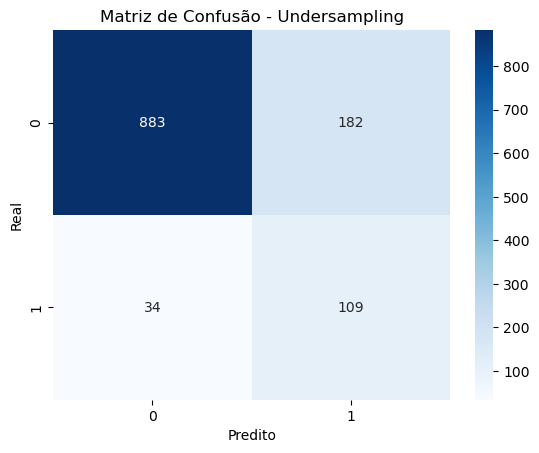

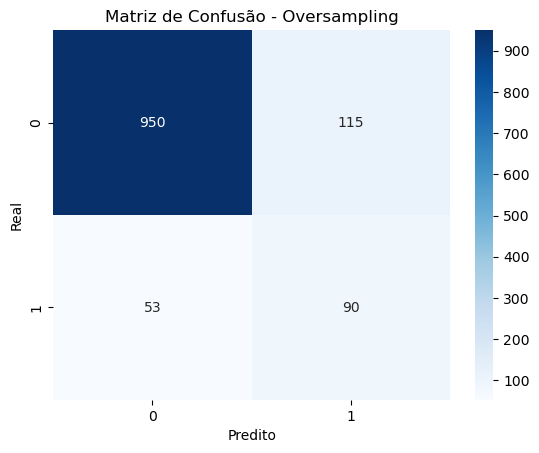

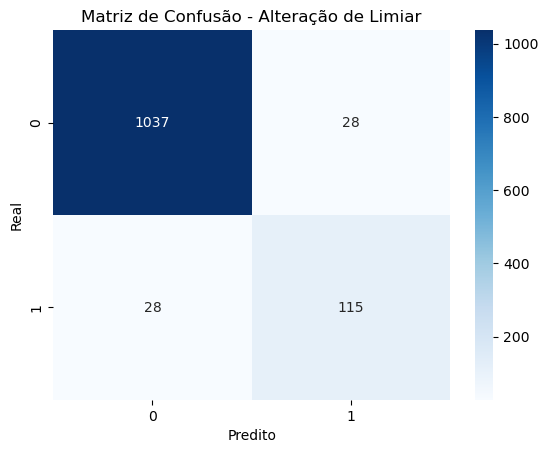

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(title)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Plotar matrizes de confusão
plot_confusion_matrix(y_test, y_pred_under, "Matriz de Confusão - Undersampling")
plot_confusion_matrix(y_test, y_pred_over, "Matriz de Confusão - Oversampling")
plot_confusion_matrix(y_test, y_pred_adjusted, "Matriz de Confusão - Alteração de Limiar")

# Curva ROC

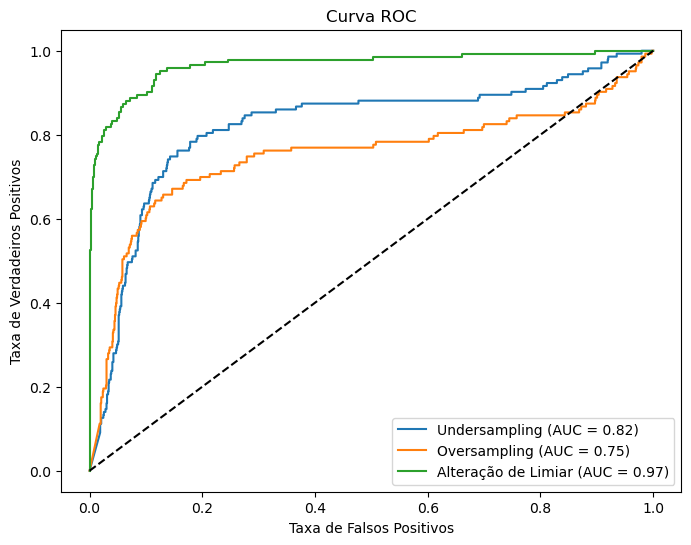

In [61]:
from sklearn.metrics import roc_curve, auc

# Função para plotar a curva ROC
def plot_roc_curve(y_true, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plotar curva ROC para cada técnica
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, model_under.predict_proba(X_test)[:, 1], "Undersampling")
plot_roc_curve(y_test, model_over.predict_proba(X_test)[:, 1], "Oversampling")
plot_roc_curve(y_test, model.predict_proba(X_test)[:, 1], "Alteração de Limiar")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Comparação de Métricas

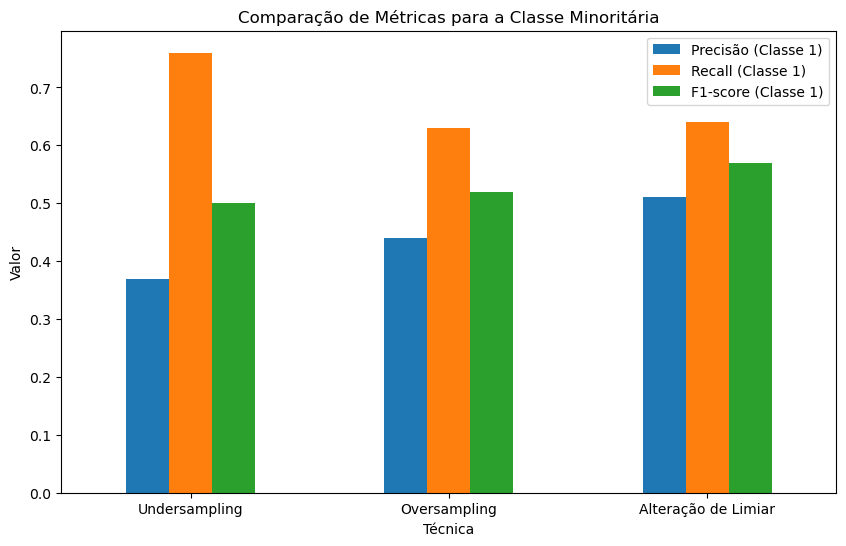

In [62]:
import pandas as pd

# Dados das métricas
metrics = {
    'Técnica': ['Undersampling', 'Oversampling', 'Alteração de Limiar'],
    'Precisão (Classe 1)': [0.37, 0.44, 0.51],
    'Recall (Classe 1)': [0.76, 0.63, 0.64],
    'F1-score (Classe 1)': [0.50, 0.52, 0.57]
}

# Criar DataFrame
df_metrics = pd.DataFrame(metrics)

# Plotar gráfico de barras
df_metrics.set_index('Técnica').plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Métricas para a Classe Minoritária')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.show()

## Questão 4 (Anulada)

## Questão 5

In [71]:
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1. Carregar os dados

In [72]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# 2. Definir a função objetivo para o Optuna

In [73]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10)
    }
    
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return accuracy_score(y_val, y_pred)

# 3. Executar o estudo com Optuna

In [74]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2025-02-14 11:31:21,472] A new study created in memory with name: no-name-b24803c4-8e2e-4c29-9027-cf08993e2db4
c:\Users\marco\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:31:21] WARNING: D:\bld\xgboost-split_1737531311373\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-14 11:31:28,209] Trial 0 finished with value: 0.9379139072847682 and parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.13172352576150467, 'subsample': 0.7532171589681493, 'colsample_bytree': 0.5319648830799073, 'gamma': 4.2294379356881375, 'reg_alpha': 9.022051810313348, 'reg_lambda': 4.997668491386324}. Best is trial 0 with value: 0.9379139072847682.
c:\Users\marco\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:31:28] WARNING: D:\bld\xgboost-split_1737531311373\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-02-14 

# 4. Treinar o modelo final com os melhores hiperparâmetros

In [75]:
best_params = study.best_params
print("Melhores hiperparâmetros:", best_params)

final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train)

y_pred_test = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Acurácia final no conjunto de testes:", accuracy)


Melhores hiperparâmetros: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.0793620227492083, 'subsample': 0.5004108906791941, 'colsample_bytree': 0.6249997579301905, 'gamma': 2.5689277104495956, 'reg_alpha': 0.09461258976390888, 'reg_lambda': 9.60142298680986}


c:\Users\marco\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:14:47] WARNING: D:\bld\xgboost-split_1737531311373\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia final no conjunto de testes: 0.9544701986754967
